In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns

### Function to Read and Load .cfile Data

In [2]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

### Calculate IQ Magnitude

In [3]:
def calculate_IQMagnitude(complex_data):
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    magnitude = np.sqrt(I**2 + Q**2)
    
    return magnitude

### Calculate IQ Angle

In [4]:
def calculate_IQ_Angle(complex_data):
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    angle = np.arctan(Q/I)
    return angle
    

### Calculate RSSI

In [18]:
def calculate_rssi(complex_data):
    """
    Calculate RSSI as 10 * log10(I[k]^2 + Q[k]^2) for each sample.
    """
    # Separate I and Q data
    I = np.real(complex_data)
    Q = np.imag(complex_data)
    
    # Calculate RSSI for each sample
    rssi = 10 * np.log10(I**2 + Q**2)
    
    return rssi

### Trunacate Vectors

In [4]:
def truncate_vectors_to_same_size(*vectors):
    # Find the minimum length among all vectors
    min_length = min(len(vec) for vec in vectors)
    # Truncate all vectors to the same length
    return [vec[:min_length] for vec in vectors]

### Sanitize Vectors

In [5]:
def sanitize_vector(vector):
    # Replace NaN or Inf values with zeros or a suitable value
    vector = np.nan_to_num(vector, nan=0.0, posinf=0.0, neginf=0.0)
    return vector

### Reading Data

In [6]:
dataWithOutInterference = getData("./nothing1.cfile")

In [7]:
dataWithOutInterference2 = getData("./nothing2.cfile")

In [8]:
dataWithInterferenceLOSCenter = getData("./centersecond1.cfile")
dataWithInterferenceLOSFirstQuartile = getData("./centerfirst1.cfile")
dataWithInterferenceLOSThirdQuartile = getData("./centerthird1.cfile")

In [9]:
dataWithInterferenceLOSCenter2 = getData("./centersecond2.cfile")
dataWithInterferenceLOSFirstQuartile2 = getData("./centerfirst2.cfile")
dataWithInterferenceLOSThirdQuartile2 = getData("./centerthird2.cfile")

In [ ]:
dataWithInterferenceLOSCenter3 = getData("./centersecond3.cfile")
dataWithInterferenceLOSFirstQuartile3 = getData("./centerfirst3.cfile")
dataWithInterferenceLOSThirdQuartile3 = getData("./centerthird3.cfile")

In [10]:
dataWithInterferenceLOSCenter4 = getData("./centersecond4.cfile")
dataWithInterferenceLOSFirstQuartile4 = getData("./centerfirst4.cfile")
dataWithInterferenceLOSThirdQuartile4 = getData("./centerthird4.cfile")

In [11]:
dataWithInterferenceNLOSLeftCenter = getData("./leftsecond1.cfile")
dataWithInterferenceNLOSLeftFirstQuartile = getData("./leftfirst1.cfile")
dataWithInterferenceNLOSLeftThirdQuartile = getData("./leftthird1.cfile")

In [12]:
dataWithInterferenceNLOSLeftCenter2 = getData("./leftsecond2.cfile")
dataWithInterferenceNLOSLeftFirstQuartile2 = getData("./leftfirst2.cfile")
dataWithInterferenceNLOSLeftThirdQuartile2 = getData("./leftthird2.cfile")

In [ ]:
dataWithInterferenceNLOSLeftCenter3 = getData("./leftsecond3.cfile")
dataWithInterferenceNLOSLeftFirstQuartile3 = getData("./leftfirst3.cfile")
dataWithInterferenceNLOSLeftThirdQuartile3 = getData("./leftthird3.cfile")

In [13]:
dataWithInterferenceNLOSLeftCenter4 = getData("./leftsecond4.cfile")
dataWithInterferenceNLOSLeftFirstQuartile4 = getData("./leftfirst4.cfile")
dataWithInterferenceNLOSLeftThirdQuartile4 = getData("./leftthird4.cfile")

In [14]:
dataWithInterferenceNLOSRightCenter = getData("./rightsecond1.cfile")
dataWithInterferenceNLOSRightFirstQuartile = getData("./rightfirst1.cfile")
dataWithInterferenceNLOSRightThirdQuartile = getData("./rightthird1.cfile")

In [15]:
dataWithInterferenceNLOSRightCenter2 = getData("./rightsecond2.cfile")
dataWithInterferenceNLOSRightFirstQuartile2 = getData("./rightfirst2.cfile")
dataWithInterferenceNLOSRightThirdQuartile2 = getData("./rightthird2.cfile")

In [ ]:
dataWithInterferenceNLOSRightCenter3 = getData("./rightsecond3.cfile")
dataWithInterferenceNLOSRightFirstQuartile3 = getData("./rightfirst3.cfile")
dataWithInterferenceNLOSRightThirdQuartile3 = getData("./rightthird3.cfile")

In [16]:
dataWithInterferenceNLOSRightCenter4 = getData("./rightsecond4.cfile")
dataWithInterferenceNLOSRightFirstQuartile4 = getData("./rightfirst4.cfile")
dataWithInterferenceNLOSRightThirdQuartile4 = getData("./rightthird4.cfile")

### Phase Vector

In [18]:
Phase_Vectors_Raw1 = [
    sanitize_vector(calculate_IQ_Angle(dataWithOutInterference)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftFirstQuartile)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftCenter)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftThirdQuartile)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSFirstQuartile)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSCenter)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSThirdQuartile)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightFirstQuartile)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightCenter)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightThirdQuartile)),
]

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_20040\2377027175.py:6: RuntimeWarning: divide by zero encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_20040\2377027175.py:6: RuntimeWarning: invalid value encountered in divide
  angle = np.arctan(Q/I)


In [19]:
Phase_Vectors_Raw2 = [
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSFirstQuartile2)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSCenter2)),

    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftFirstQuartile2)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftCenter2)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftThirdQuartile2)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSThirdQuartile2)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightFirstQuartile2)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightCenter2)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightThirdQuartile2)),
]

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_20040\2377027175.py:6: RuntimeWarning: divide by zero encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_20040\2377027175.py:6: RuntimeWarning: invalid value encountered in divide
  angle = np.arctan(Q/I)


In [ ]:
Phase_Vectors_Raw3 = [
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSFirstQuartile3)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSCenter3)),

    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftFirstQuartile3)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftCenter3)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftThirdQuartile3)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSThirdQuartile3)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightFirstQuartile3)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightCenter3)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightThirdQuartile3)),
]

In [20]:
Phase_Vectors_Raw4 = [
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftFirstQuartile4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftCenter4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSLeftThirdQuartile4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSFirstQuartile4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSCenter4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceLOSThirdQuartile4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightFirstQuartile4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightCenter4)),
    sanitize_vector(calculate_IQ_Angle(dataWithInterferenceNLOSRightThirdQuartile4)),
]

C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_20040\2377027175.py:6: RuntimeWarning: divide by zero encountered in divide
  angle = np.arctan(Q/I)
C:\Users\Deelaka Algawatta\AppData\Local\Temp\ipykernel_20040\2377027175.py:6: RuntimeWarning: invalid value encountered in divide
  angle = np.arctan(Q/I)


In [ ]:
Phase_Vectors_Raw = (Phase_Vectors_Raw1 + Phase_Vectors_Raw2 + Phase_Vectors_Raw3 +  Phase_Vectors_Raw4)
# Phase_Vectors_Raw = (Phase_Vectors_Raw1 + Phase_Vectors_Raw2)

In [ ]:
Phase_Vectors = truncate_vectors_to_same_size(*Phase_Vectors_Raw)

# Map back truncated vectors to their variables
(
    phase_WithOutInterference,
    
    phase_NLOSLeftFirstQuartile,
    phase_NLOSLeftCenter,
    phase_NLOSLeftThirdQuartile,
    phase_LOSFirstQuartile,
    phase_LOSCenter,
    phase_LOSThirdQuartile,
    phase_NLOSRightFirstQuartile,
    phase_NLOSRightCenter,
    phase_NLOSRightThirdQuartile,

    phase_LOSFirstQuartile2,
    phase_LOSCenter2,

    phase_NLOSLeftFirstQuartile2,
    phase_NLOSLeftCenter2,
    phase_NLOSLeftThirdQuartile2,
    
    phase_LOSThirdQuartile2,
    phase_NLOSRightFirstQuartile2,
    phase_NLOSRightCenter2,
    phase_NLOSRightThirdQuartile2,

    phase_NLOSLeftFirstQuartile3,
    phase_NLOSLeftCenter3,
    phase_NLOSLeftThirdQuartile3,
    phase_LOSFirstQuartile3,
    phase_LOSCenter3,
    phase_LOSThirdQuartile3,
    phase_NLOSRightFirstQuartile3,
    phase_NLOSRightCenter3,
    phase_NLOSRightThirdQuartile3,

    phase_NLOSLeftFirstQuartile4,
    phase_NLOSLeftCenter4,
    phase_NLOSLeftThirdQuartile4,
    phase_LOSFirstQuartile4,
    phase_LOSCenter4,
    phase_LOSThirdQuartile4,
    phase_NLOSRightFirstQuartile4,
    phase_NLOSRightCenter4,
    phase_NLOSRightThirdQuartile4,
) = Phase_Vectors

In [ ]:
phase_NLOSLeftFirstQuartile_Cleaned = phase_NLOSLeftFirstQuartile - phase_WithOutInterference
phase_NLOSLeftCenter_Cleaned = phase_NLOSLeftCenter - phase_WithOutInterference
phase_NLOSLeftThirdQuartile_Cleaned =  phase_NLOSLeftThirdQuartile - phase_WithOutInterference
phase_LOSFirstQuartile_Cleaned = phase_LOSFirstQuartile - phase_WithOutInterference
phase_LOSCenter_Cleaned = phase_LOSCenter - phase_WithOutInterference
phase_LOSThirdQuartile_Cleaned = phase_LOSThirdQuartile - phase_WithOutInterference
phase_NLOSRightFirstQuartile_Cleaned = phase_NLOSRightFirstQuartile - phase_WithOutInterference
phase_NLOSRightCenter_Cleaned = phase_NLOSRightCenter - phase_WithOutInterference
phase_NLOSRightThirdQuartile_Cleaned = phase_NLOSRightThirdQuartile - phase_WithOutInterference

phase_LOSFirstQuartile2_Cleaned = phase_LOSFirstQuartile2 - phase_WithOutInterference
phase_LOSCenter2_Cleaned = phase_LOSCenter2 - phase_WithOutInterference

phase_NLOSLeftFirstQuartile2_Cleaned = phase_NLOSLeftFirstQuartile2 - phase_WithOutInterference
phase_NLOSLeftCenter2_Cleaned = phase_NLOSLeftCenter2 - phase_WithOutInterference
phase_NLOSLeftThirdQuartile2_Cleaned =  phase_NLOSLeftThirdQuartile2 - phase_WithOutInterference
phase_LOSThirdQuartile2_Cleaned = phase_LOSThirdQuartile2 - phase_WithOutInterference
phase_NLOSRightFirstQuartile2_Cleaned = phase_NLOSRightFirstQuartile2 - phase_WithOutInterference
phase_NLOSRightCenter2_Cleaned = phase_NLOSRightCenter2 - phase_WithOutInterference
phase_NLOSRightThirdQuartile2_Cleaned = phase_NLOSRightThirdQuartile2 - phase_WithOutInterference

phase_NLOSLeftFirstQuartile3_Cleaned = phase_NLOSLeftFirstQuartile3 - phase_WithOutInterference
phase_NLOSLeftCenter3_Cleaned = phase_NLOSLeftCenter3 - phase_WithOutInterference
phase_NLOSLeftThirdQuartile3_Cleaned =  phase_NLOSLeftThirdQuartile3 - phase_WithOutInterference
phase_LOSFirstQuartile3_Cleaned = phase_LOSFirstQuartile3 - phase_WithOutInterference
phase_LOSCenter3_Cleaned = phase_LOSCenter3 - phase_WithOutInterference
phase_LOSThirdQuartile3_Cleaned = phase_LOSThirdQuartile3 - phase_WithOutInterference
phase_NLOSRightFirstQuartile3_Cleaned = phase_NLOSRightFirstQuartile3 - phase_WithOutInterference
phase_NLOSRightCenter3_Cleaned = phase_NLOSRightCenter3 - phase_WithOutInterference
phase_NLOSRightThirdQuartile3_Cleaned = phase_NLOSRightThirdQuartile3 - phase_WithOutInterference

phase_NLOSLeftFirstQuartile4_Cleaned = phase_NLOSLeftFirstQuartile4 - phase_WithOutInterference
phase_NLOSLeftCenter4_Cleaned = phase_NLOSLeftCenter4 - phase_WithOutInterference
phase_NLOSLeftThirdQuartile4_Cleaned =  phase_NLOSLeftThirdQuartile4 - phase_WithOutInterference
phase_LOSFirstQuartile4_Cleaned = phase_LOSFirstQuartile4 - phase_WithOutInterference
phase_LOSCenter4_Cleaned = phase_LOSCenter4 - phase_WithOutInterference
phase_LOSThirdQuartile4_Cleaned = phase_LOSThirdQuartile4 - phase_WithOutInterference
phase_NLOSRightFirstQuartile4_Cleaned = phase_NLOSRightFirstQuartile4 - phase_WithOutInterference
phase_NLOSRightCenter4_Cleaned = phase_NLOSRightCenter4 - phase_WithOutInterference
phase_NLOSRightThirdQuartile4_Cleaned = phase_NLOSRightThirdQuartile4 - phase_WithOutInterference

#### Phase Vector Cleaned Mean Array Calculation for 1, 2, 3

In [ ]:
phase_LOSCenter_Array = np.array([phase_LOSCenter_Cleaned, phase_LOSCenter2_Cleaned, phase_LOSCenter3_Cleaned])
phase_LOSCenter_Mean_Array14 = np.mean(phase_LOSCenter_Array, axis=0)
phase_LOSFirstQuartile_Array = np.array([phase_LOSFirstQuartile_Cleaned, phase_LOSFirstQuartile2_Cleaned, phase_LOSFirstQuartile3_Cleaned])
phase_LOSFirstQuartile_Mean_Array14 = np.mean(phase_LOSFirstQuartile_Array, axis=0)
phase_LOSThirdQuartile_Array = np.array([phase_LOSThirdQuartile_Cleaned, phase_LOSThirdQuartile2_Cleaned, phase_LOSThirdQuartile3_Cleaned])
phase_LOSThirdQuartile_Mean_Array14 = np.mean(phase_LOSThirdQuartile_Array, axis=0)

In [ ]:
phase_NLOSLeftCenter_Array = np.array([phase_NLOSLeftCenter_Cleaned, phase_NLOSLeftCenter2_Cleaned, phase_NLOSLeftCenter3_Cleaned])
phase_NLOSLeftCenter_Mean_Array14 = np.mean(phase_NLOSLeftCenter_Array, axis=0)
phase_NLOSLeftFirstQuartile_Array = np.array([phase_NLOSLeftFirstQuartile_Cleaned, phase_NLOSLeftFirstQuartile2_Cleaned, phase_NLOSLeftFirstQuartile3_Cleaned])
phase_NLOSLeftFirstQuartile_Mean_Array14 = np.mean(phase_NLOSLeftFirstQuartile_Array, axis=0)
phase_NLOSLeftThirdQuartile_Array = np.array([phase_NLOSLeftThirdQuartile_Cleaned, phase_NLOSLeftThirdQuartile2_Cleaned, phase_NLOSLeftThirdQuartile3_Cleaned])
phase_NLOSLeftThirdQuartile_Mean_Array14 = np.mean(phase_NLOSLeftThirdQuartile_Array, axis=0)

In [ ]:
phase_NLOSRightCenter_Array = np.array([phase_NLOSRightCenter_Cleaned, phase_NLOSRightCenter2_Cleaned, phase_NLOSRightCenter3_Cleaned])
phase_NLOSRightCenter_Mean_Array14 = np.mean(phase_NLOSRightCenter_Array, axis=0)
phase_NLOSRightFirstQuartile_Array = np.array([phase_NLOSRightFirstQuartile_Cleaned, phase_NLOSRightFirstQuartile2_Cleaned, phase_NLOSRightFirstQuartile3_Cleaned])
phase_NLOSRightFirstQuartile_Mean_Array14 = np.mean(phase_NLOSRightFirstQuartile_Array, axis=0)
phase_NLOSRightThirdQuartile_Array = np.array([phase_NLOSRightThirdQuartile_Cleaned, phase_NLOSRightThirdQuartile2_Cleaned, phase_NLOSRightThirdQuartile3_Cleaned])
phase_NLOSRightThirdQuartile_Mean_Array14 = np.mean(phase_NLOSRightThirdQuartile_Array, axis=0)

#### Heat Map for Phase Vector Cleaned Mean Array for 1, 2, 3(4)

In [ ]:
Phase_Vector_Euclidean_LOSCenter2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_LOSCenter4_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_LOSCenter4_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_LOSCenter4_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_LOSCenter4_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_LOSCenter4_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_LOSCenter4_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_LOSCenter4_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_LOSCenter4_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_LOSCenter4_Cleaned),
    ],
])

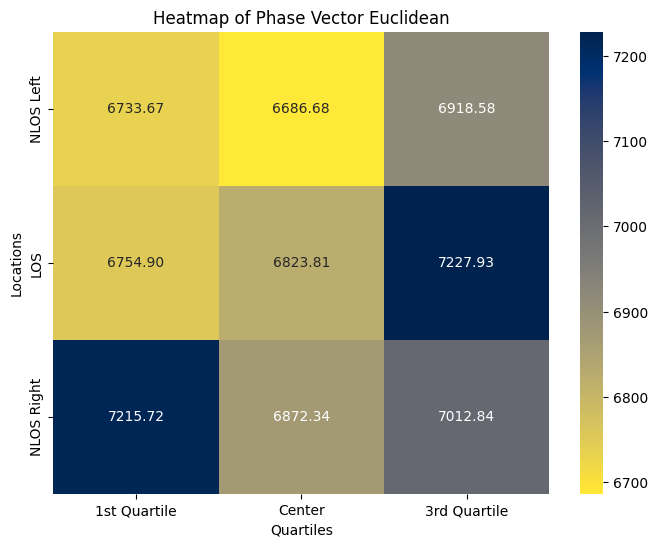

In [29]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSCenter2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_LOSFirstQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_LOSFirstQuartile4_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_LOSFirstQuartile4_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_LOSFirstQuartile4_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_LOSFirstQuartile4_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_LOSFirstQuartile4_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_LOSFirstQuartile4_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_LOSFirstQuartile4_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_LOSFirstQuartile4_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_LOSFirstQuartile4_Cleaned),
    ],
])

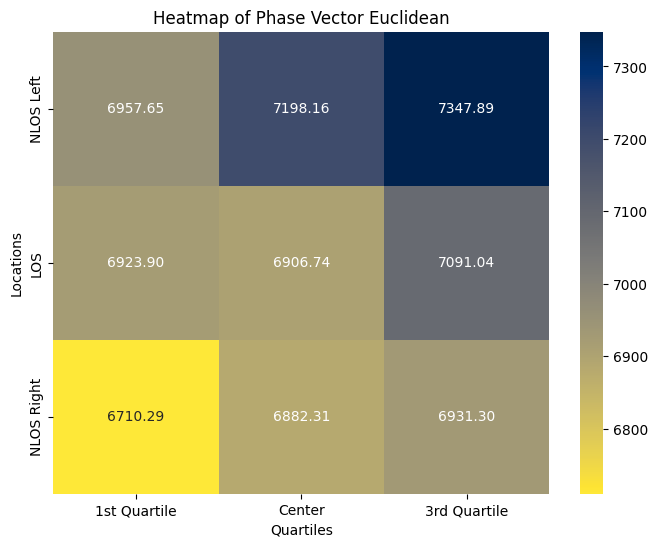

In [31]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSFirstQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_LOSThirdQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_LOSThirdQuartile4_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_LOSThirdQuartile4_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_LOSThirdQuartile4_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_LOSThirdQuartile4_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_LOSThirdQuartile4_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_LOSThirdQuartile4_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_LOSThirdQuartile4_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_LOSThirdQuartile4_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_LOSThirdQuartile4_Cleaned),
    ],
])

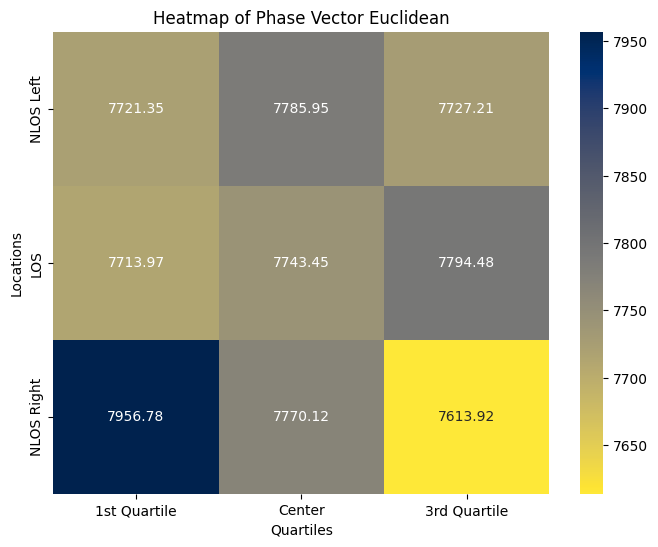

In [33]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_LOSThirdQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSRightCenter2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_NLOSRightCenter4_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_NLOSRightCenter4_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_NLOSRightCenter4_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_NLOSRightCenter4_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_NLOSRightCenter4_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_NLOSRightCenter4_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_NLOSRightCenter4_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_NLOSRightCenter4_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_NLOSRightCenter4_Cleaned),
    ],
])

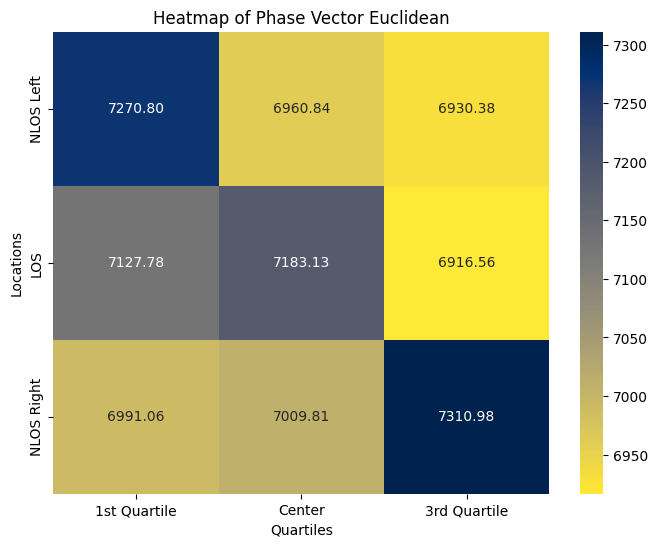

In [35]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSRightCenter2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSRightFirstQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_NLOSRightFirstQuartile4_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_NLOSRightFirstQuartile4_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_NLOSRightFirstQuartile4_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_NLOSRightFirstQuartile4_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_NLOSRightFirstQuartile4_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_NLOSRightFirstQuartile4_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_NLOSRightFirstQuartile4_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_NLOSRightFirstQuartile4_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_NLOSRightFirstQuartile4_Cleaned),
    ],
])

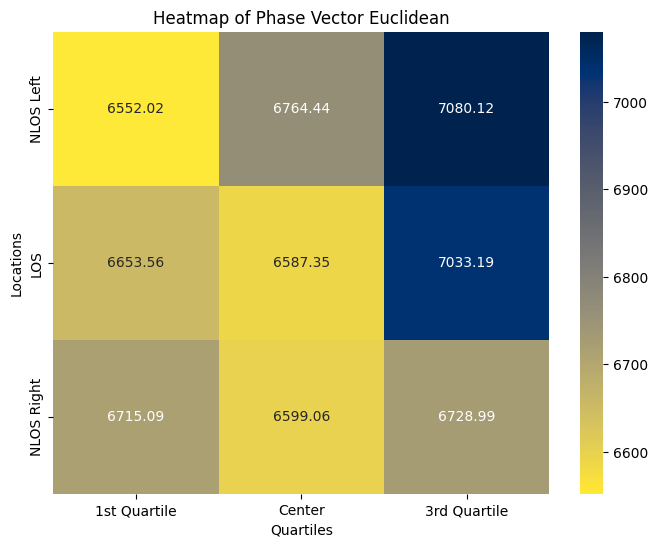

In [37]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSRightFirstQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSRightThirdQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_NLOSRightThirdQuartile4_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_NLOSRightThirdQuartile4_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_NLOSRightThirdQuartile4_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_NLOSRightThirdQuartile4_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_NLOSRightThirdQuartile4_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_NLOSRightThirdQuartile4_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_NLOSRightThirdQuartile4_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_NLOSRightThirdQuartile4_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_NLOSRightThirdQuartile4_Cleaned),
    ],
])

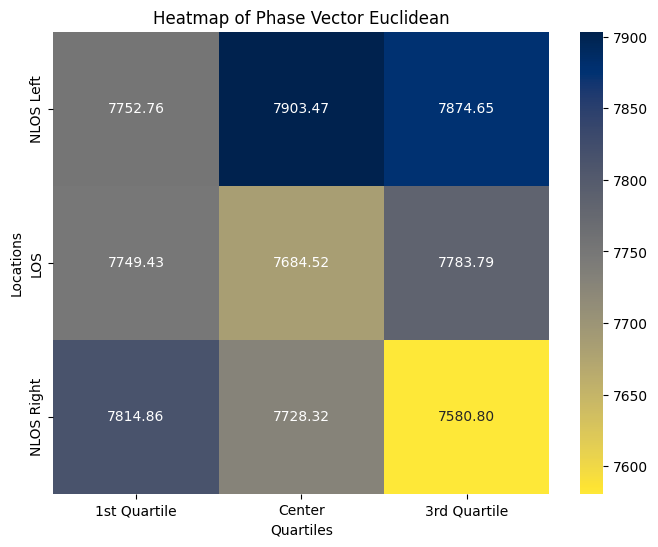

In [39]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSRightThirdQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSLeftThirdQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_NLOSLeftThirdQuartile4_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_NLOSLeftThirdQuartile4_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_NLOSLeftThirdQuartile4_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_NLOSLeftThirdQuartile4_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_NLOSLeftThirdQuartile4_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_NLOSLeftThirdQuartile4_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_NLOSLeftThirdQuartile4_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_NLOSLeftThirdQuartile4_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_NLOSLeftThirdQuartile4_Cleaned),
    ],
])

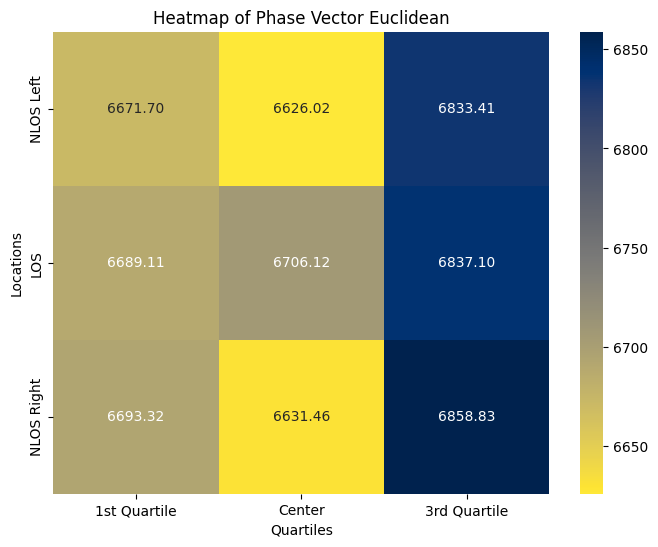

In [41]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSLeftThirdQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSLeftFirstQuartile2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_NLOSLeftFirstQuartile4_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_NLOSLeftFirstQuartile4_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_NLOSLeftFirstQuartile4_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_NLOSLeftFirstQuartile4_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_NLOSLeftFirstQuartile4_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_NLOSLeftFirstQuartile4_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_NLOSLeftFirstQuartile4_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_NLOSLeftFirstQuartile4_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_NLOSLeftFirstQuartile4_Cleaned),
    ],
])

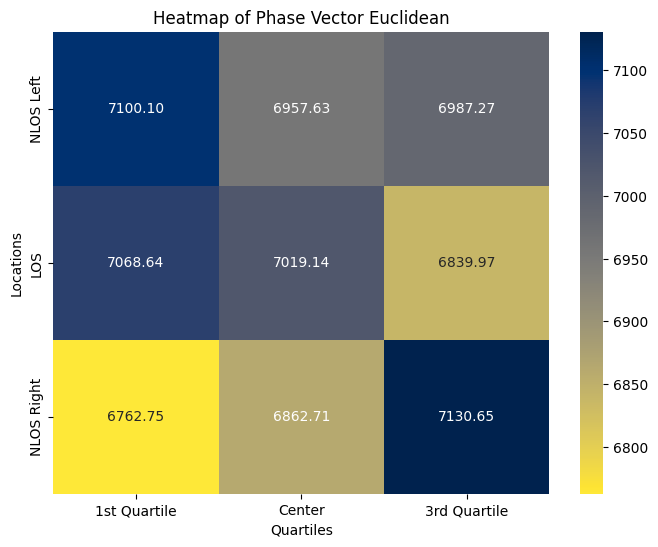

In [43]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSLeftFirstQuartile2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()

In [ ]:
Phase_Vector_Euclidean_NLOSLeftCenter2_Cleaned_Mean_Array14 = np.array([
    [
        distance.euclidean(phase_NLOSLeftFirstQuartile_Mean_Array14, phase_NLOSLeftCenter4_Cleaned),
        distance.euclidean(phase_NLOSLeftCenter_Mean_Array14, phase_NLOSLeftCenter4_Cleaned),
        distance.euclidean(phase_NLOSLeftThirdQuartile_Mean_Array14, phase_NLOSLeftCenter4_Cleaned),
    ],
    [
        distance.euclidean(phase_LOSFirstQuartile_Mean_Array14, phase_NLOSLeftCenter4_Cleaned),
        distance.euclidean(phase_LOSCenter_Mean_Array14, phase_NLOSLeftCenter4_Cleaned),
        distance.euclidean(phase_LOSThirdQuartile_Mean_Array14, phase_NLOSLeftCenter4_Cleaned),
    ],
    [
        distance.euclidean(phase_NLOSRightFirstQuartile_Mean_Array14, phase_NLOSLeftCenter4_Cleaned),
        distance.euclidean(phase_NLOSRightCenter_Mean_Array14, phase_NLOSLeftCenter4_Cleaned),
        distance.euclidean(phase_NLOSRightThirdQuartile_Mean_Array14, phase_NLOSLeftCenter4_Cleaned),
    ],
])

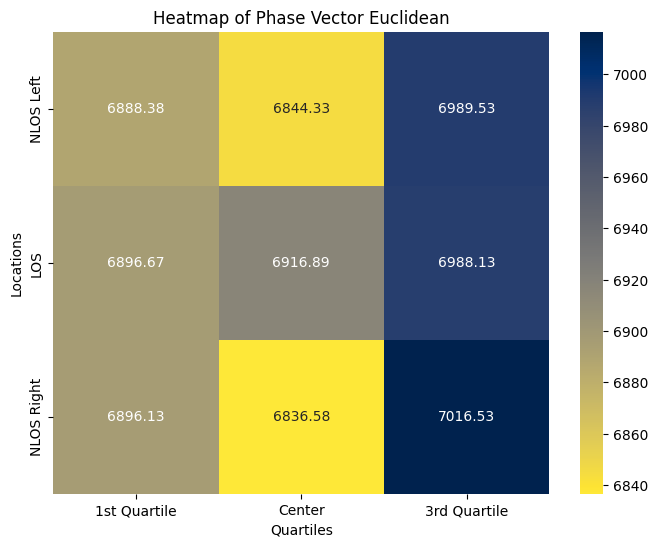

In [45]:
# Create a heatmap with reversed colormap
plt.figure(figsize=(8, 6))
sns.heatmap(
    Phase_Vector_Euclidean_NLOSLeftCenter2_Cleaned_Mean_Array14, 
    annot=True, 
    cmap="cividis_r",  # Reversed colormap for yellow closer to 0
    fmt=".2f",
    xticklabels=["1st Quartile", "Center", "3rd Quartile"],
    yticklabels=["NLOS Left", "LOS", "NLOS Right"]
)
plt.title("Heatmap of Phase Vector Euclidean")
plt.xlabel("Quartiles")
plt.ylabel("Locations")
plt.show()